## Back propagation with two input nodes, one hidden layer node and one output node

Assuming;  
* inputs $i_{1}, i_{2}$
* hidden node $J$ 
* output node $K$
* target $t_{k}$
* learning rate $\eta$   
* Weights $W_{ji_{1}},W_{ji_{2}},W_{jk},\Theta_{j},\Theta_{k}$   

**Towards output**  

1. Compute input potential $U_{j} $

$$ U_{j} = \Sigma_{i}(i_{i} \cdot W_{j,i_{i}})+\Theta_{j} $$

2. Compute output (sigmoid activation function) $o_{j}$  

$$o_{j} = h(U_{j}) = \frac{1}{1+e^{-U_{j}}} $$ 

3. Compute $h'_{j}$  


$$ h_{j}'(U_{j}) = \frac{e^{-U_{j}}}{(1 + e^{-U_j})^2} $$  

4. Compute input potential $U_{k}$  

$$ U_{k} = (o_{j} \cdot W_{j,k})+\Theta_{k} $$ 

5. Compute output $o_{k}$  

$$o_{k} = h(U_{k}) = \frac{1}{1+e^{-U_{k}}} $$ 

6. Compute $h_{k}'$  

$$ h_{k}'(U_{k}) = \frac{e^{-U_{k}}}{(1 + e^{-U_k})^2} $$  

7. Compute error $e_{k}$  

$$ e_{k} = o_{k} - t_{k} $$

**Towards input**

8. Compute $\partial o_{k}$  

$$ \partial o_{k} = e_{k} \cdot h'(U_{k}) $$  

9.  Compute error $e_{j}$  

$$ e_{j} = W_{k,j} \cdot \partial o_{k} $$

10. Compute $\partial o_{j}$  

$$ \partial o_{j} = e_{j} \cdot h'(U_{j}) $$  

11. Compute $\Delta W_{kj}$ 

$$ \Delta W_{kj} = -\eta \cdot \partial o_{k} \cdot o_{j} $$  

12. Compute $\Delta W_{ji_{1}}$  

$$ \Delta W_{ji_{1}} = -\eta \cdot \partial o_{j} \cdot o_{i_{1}} $$  

13. Compute $\Delta W_{ji_{2}}$  

$$ \Delta W_{ji_{2}} = -\eta \cdot \partial o_{j} \cdot o_{i_{2}} $$ 

14. Compute $\Delta \Theta _{k}$  

$$ \Delta \Theta _{k} = -\eta \cdot \partial k $$  

15. Compute $\Delta \Theta _{j}$  

$$ \Delta \Theta _{j} = -\eta \cdot \partial j $$  




In [65]:
import numpy as np
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        
        
import numpy
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# The following code is used for hiding the warnings and make this notebook clearer.
import warnings
warnings.filterwarnings('ignore')

def tanh(x):
    return (1.0 - numpy.exp(-2*x))/(1.0 + numpy.exp(-2*x))

def tanh_derivative(x):
    return (1 + tanh(x))*(1 - tanh(x))

def sigmoid(x):
    return 1 / (1 + numpy.exp(-x))

def sigmoid_derivative(y):
    return y * (1 - y)

class NeuralNetwork:
    #########
    # parameters
    # ----------
    # self:      the class object itself
    # net_arch:  consists of a list of integers, indicating
    #            the number of neurons in each layer, i.e. the network architecture
    #########
    def __init__(self, net_arch, af):
        numpy.random.seed(0)
        
        # set activation function
        if af == 't':
            actF = [tanh,tanh_derivative]
        else:
            actF = [sigmoid,sigmoid_derivative]
            
        # Initialized the weights, making sure we also 
        # initialize the weights for the biases that we will add later
        self.activity = actF[0] # tanh
        self.activity_derivative = actF[1] # tanh_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1
        self.arch = net_arch
        self.weights = []

        # Random initialization with range of weight values (-1,1)
        for layer in range(self.layers - 1):
            w = 2*numpy.random.rand(net_arch[layer] + 1, net_arch[layer+1]) - 1
            self.weights.append(w)
    
    def _forward_prop(self, x):
        y = x

        for i in range(len(self.weights)-1):
            activation = numpy.dot(y[i], self.weights[i])
            activity = self.activity(activation)

            # add the bias for the next layer
            activity = numpy.concatenate((numpy.ones(1), numpy.array(activity)))
            y.append(activity)

        # last layer
        activation = numpy.dot(y[-1], self.weights[-1])
        activity = self.activity(activation)
        y.append(activity)
        
        return y
    
    def _back_prop(self, y, target, learning_rate):
        error = target - y[-1]
        delta_vec = [error * self.activity_derivative(y[-1])]

        # we need to begin from the back, from the next to last layer
        for i in range(self.layers-2, 0, -1):
            error = delta_vec[-1].dot(self.weights[i][1:].T)
            error = error*self.activity_derivative(y[i][1:])
            delta_vec.append(error)

        # Now we need to set the values from back to front
        delta_vec.reverse()
        
        # Finally, we adjust the weights, using the backpropagation rules
        for i in range(len(self.weights)):
            layer = y[i].reshape(1, self.arch[i]+1)
            delta = delta_vec[i].reshape(1, self.arch[i+1])
            self.weights[i] += learning_rate*layer.T.dot(delta)
    
    #########
    # parameters
    # ----------
    # self:    the class object itself
    # data:    the set of all possible pairs of booleans True or False indicated by the integers 1 or 0
    # labels:  the result of the logical operation 'xor' on each of those input pairs
    #########
    def fit(self, data, labels, learning_rate=0.1, epochs=100):
        
        # Add bias units to the input layer - 
        # add a "1" to the input data (the always-on bias neuron)
        ones = numpy.ones((1, data.shape[0]))
        Z = numpy.concatenate((ones.T, data), axis=1)
        
        for k in range(epochs):
            if (k+1) % 10000 == 0:
                print('epochs: {}'.format(k+1))
        
            sample = numpy.random.randint(X.shape[0])

            # We will now go ahead and set up our feed-forward propagation:
            x = [Z[sample]]
            y = self._forward_prop(x)

            # Now we do our back-propagation of the error to adjust the weights:
            target = labels[sample]
            self._back_prop(y, target, learning_rate)
    
    #########
    # the predict function is used to check the prediction result of
    # this neural network.
    # 
    # parameters
    # ----------
    # self:   the class object itself
    # x:      single input data
    #########
    def predict_single_data(self, x):
        val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activity(numpy.dot(val, self.weights[i]))
            val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))
        return val[1]
    
    #########
    # the predict function is used to check the prediction result of
    # this neural network.
    # 
    # parameters
    # ----------
    # self:   the class object itself
    # X:      the input data array
    #########
    def predict(self, X):
        Y = numpy.array([]).reshape(0, self.arch[-1])
        for x in X:
            y = numpy.array([[self.predict_single_data(x)]])
            Y = numpy.vstack((Y,y))
        return Y



In [73]:
numpy.random.seed(0)

# Initialize the NeuralNetwork with
# 2 input neurons
# 2 hidden neurons
# 1 output neuron
nn = NeuralNetwork([2,2,1], 't')

# Set the input data
X = numpy.array([[0, 0], [0, 1],
                [1, 0], [1, 1]])

# Set the labels, the correct results for the xor operation
y = numpy.array([0, 1, 
                 1, 0])

# Call the fit function and train the network for a chosen number of epochs
nn.fit(X, y, epochs=3200)

# Show the prediction results
print("Final prediction")
print("i1 i2 t o")

i = 0;
for s in X:
    print(s, y[i], nn.predict_single_data(s))
    i = i + 1;
    
print("Weights:")
# Six weights and 3 biases
print(nn.weights)

Final prediction
i1 i2 t o
[0 0] 0 0.005303951382860608
[0 1] 1 0.9712935737946203
[1 0] 1 0.9687222281833928
[1 1] 0 0.00018983081586937937
Weights:
[array([[ 1.93345005, -0.58051179],
       [-1.32209046,  1.45840748],
       [-1.30544105,  1.47097214]]), array([[-1.0012255 ],
       [ 2.40956478],
       [ 2.49364711]])]


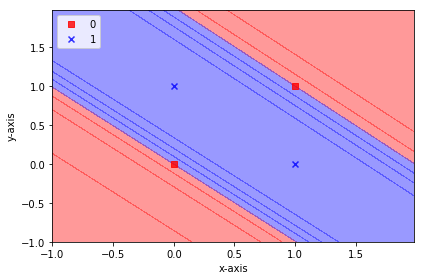

In [74]:
plot_decision_regions(X, y, nn)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()